In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [28]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [29]:
# loadind the data
data = pd.read_csv('dataset.csv')

In [30]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [31]:
data=data.drop('Name',axis=1)
data=data.drop('SibSp',axis=1)
data=data.drop('Parch',axis=1)
data=data.drop('Ticket',axis=1)
data=data.drop('Cabin',axis=1)
data=data.drop('Embarked',axis=1)

In [32]:
data.head()

,PassengerId,Pclass,Sex,Age,Fare,Survived
0,1,3,male,22.0,7.2500,0
1,2,1,female,38.0,71.2833,1
2,3,3,female,26.0,7.9250,1
3,4,1,female,35.0,53.1000,1
4,5,3,male,35.0,8.0500,0


In [33]:
data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
Fare             0
Survived         0
dtype: int64

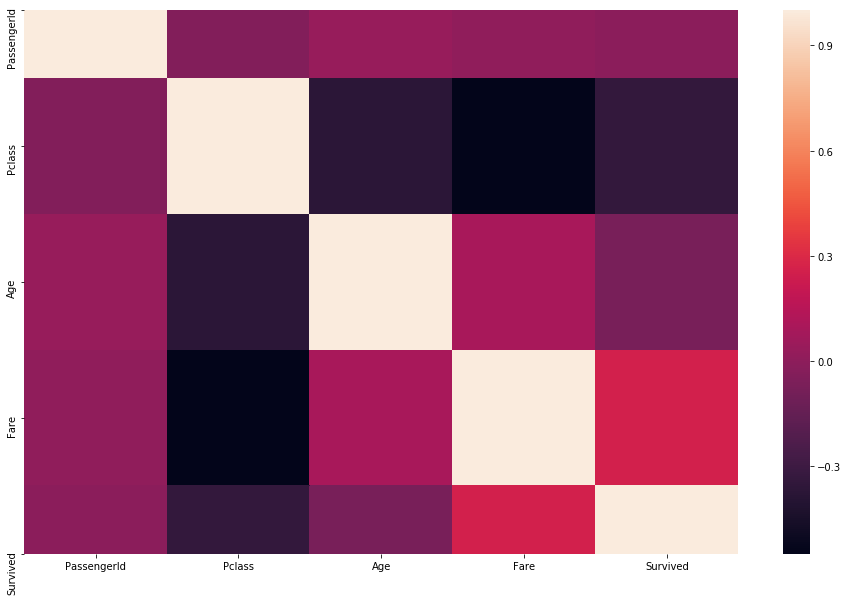

In [34]:
cor=data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

In [35]:
data.corr()

,PassengerId,Pclass,Age,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,0.096067,-0.077221
Fare,0.012658,-0.549500,0.096067,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,0.257307,1.000000


In [36]:
x=data['Age']//data['Fare']
d = {'ratio': x, 'S': data['Survived']}
df = pd.DataFrame(data=d)
df.corr()

,ratio,S
ratio,1.000000,-0.337434
S,-0.337434,1.000000


In [37]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
data['Age']=data['Age'].fillna(35)

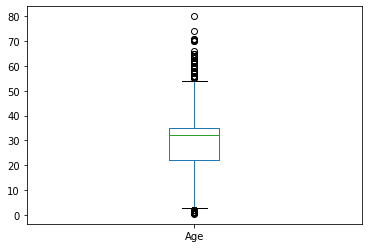

In [39]:
data['Age'].plot.box()

In [40]:
data.loc[data['Age']>60,'Age']=60

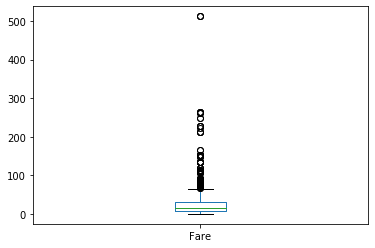

In [41]:
data['Fare'].plot.box()

In [42]:
data.loc[data['Fare']>70,'Fare']=70

In [43]:
train_data=data[:750]
test_data=data[751:]

In [44]:
target_train_data=train_data['Survived']
train_data=train_data.drop('Survived',axis=1)
train_data=train_data.drop('PassengerId',axis=1)

target_test_data=test_data['Survived']
test_data=test_data.drop('Survived',axis=1)
test_data=test_data.drop('PassengerId',axis=1)



In [45]:
train_data.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.250
1,1,female,38.0,70.000
2,3,female,26.0,7.925
3,1,female,35.0,53.100
4,3,male,35.0,8.050


In [46]:
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

In [47]:
train_data.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.250,0,1
1,1,38.0,70.000,1,0
2,3,26.0,7.925,1,0
3,1,35.0,53.100,1,0
4,3,35.0,8.050,0,1


In [48]:
from sklearn.tree import DecisionTreeClassifier
cf = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=6)
cf.fit(train_data,target_train_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
cf.score(test_data,target_test_data)

0.85